In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 7\\datos\\online_shoppers_intention_clase_nonulls_estan_sinout_encoding.csv', index_col=0).reset_index(drop=True)
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,11.461524,2.0,3.0,5.077266,4.820688,1.074171,3.044277
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,-0.263158,-0.533333,-0.221550,2.0,2.0,5.019744,5.067919,0.965979,7.013654
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,-0.221550,2.0,1.0,4.761668,8.752755,0.913082,3.080806
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,-0.052632,-0.533333,2.699218,2.0,4.0,5.019744,5.178251,0.965979,6.546186
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,-0.263158,-0.266667,0.946757,2.0,4.0,2.279404,5.067919,0.965979,6.546186


In [5]:
x= df.drop(columns='PageValues')
y = df[['PageValues']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42) # puede ser train_size = 0.8
#shuffle = true

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 8.34938432],
       [-2.30430536],
       [ 3.89815644]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[6.08809217],
       [6.65351754],
       [7.27723389]])

In [10]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

# K Fold

In [11]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)

0.05073104684239045

In [12]:
kf = KFold(n_splits=5, #entre 5 y 10
           shuffle=True, # puede repetir cajas
           random_state=42)

score_mse = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="neg_mean_squared_error")

score_mse # me quedo con la media de mis r2
abs(np.mean(score_mse))

255.88384293244866

In [13]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse))

15.97187565582368

In [14]:
kf_2 = KFold(n_splits=250, # a mayor cantidad, reduce un poco el error
           shuffle=True, 
           random_state=42)

score_rmse2 = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf_2, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse2))

14.469553439109838

#LOO

In [15]:
loo = LeaveOneOut()
scores = []

for indice in range(df.shape[0]):
    x_test_cv= x.iloc[[indice]] # i es el indice, iloc es la columna
    x_train_cv = x.drop(index = indice) # droppeo el indice anterior y me quedo lo demás
    y_test_cv = y.loc[indice,:]
    y_train_cv = y.drop(index = indice)

    modelo_lineal.fit(x_train_cv, y_train_cv)
    y_pred = modelo_lineal.predict(x_test_cv)

    rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred))

    scores.append(rmse)

np.mean(scores)


8.08400226331473

In [16]:
pd.options.display.float_format = "{:,.2f}".format
df_coef = pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coef.sort_values(by=0, key = abs, ascending=False)

,0
ExitRates,-2.53
VisitorType,-1.93
ProductRelatedDuration,0.98
OperatingSystems,-0.96
Administrative_knn,0.68
BounceRates_knn,0.62
ProductRelated_knn,-0.59
Region,0.49
Browser,0.48
TrafficType,0.37


Podemos quitar algunas variables, aquellas que son cercanas a 0. Agilizo mi modelo, además en caso de overfitting puedo quitar variables.

## Decision Tree

In [17]:
modelo_arbol = DecisionTreeRegressor(
                    # max_depth=3,
                    # max_leaf_nodes=15,
                    # min_samples_split=150,
                    # min_samples_leaf=25,
                    # random_state=42
)

modelo_arbol.fit(x_train, y_train)

y_pred_test = modelo_arbol.predict(x_test)
y_pred_train = modelo_arbol.predict(x_train)
df_metricas_arbol = metricas(y_train, y_pred_train, y_test, y_pred_test)

In [18]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,1.00,0.00,0.00,0.00
test,-1.19,8.72,556.26,23.59


[Text(0.49392040050909813, 0.984375, 'ExitRates <= -0.18\nsquared_error = 276.057\nsamples = 8631\nvalue = 5.047'),
 Text(0.2879181875955344, 0.953125, 'Browser <= 12.339\nsquared_error = 592.31\nsamples = 2849\nvalue = 10.047'),
 Text(0.3909192940523163, 0.96875, 'True  '),
 Text(0.08428137972266554, 0.921875, 'ExitRates <= -0.702\nsquared_error = 524.345\nsamples = 2830\nvalue = 9.753'),
 Text(0.015180355577319506, 0.890625, 'AdministrativeDuration <= 2.243\nsquared_error = 1424.06\nsamples = 57\nvalue = 28.305'),
 Text(0.011657754855423304, 0.859375, 'Region <= 5.007\nsquared_error = 1292.724\nsamples = 52\nvalue = 25.208'),
 Text(0.00941466381278088, 0.828125, 'AdministrativeDuration <= 0.951\nsquared_error = 609.662\nsamples = 35\nvalue = 18.533'),
 Text(0.008403693202012463, 0.796875, 'ProductRelated_knn <= 0.383\nsquared_error = 670.372\nsamples = 26\nvalue = 23.322'),
 Text(0.007898207896628255, 0.765625, 'Month <= 6.012\nsquared_error = 544.986\nsamples = 25\nvalue = 20.902'),

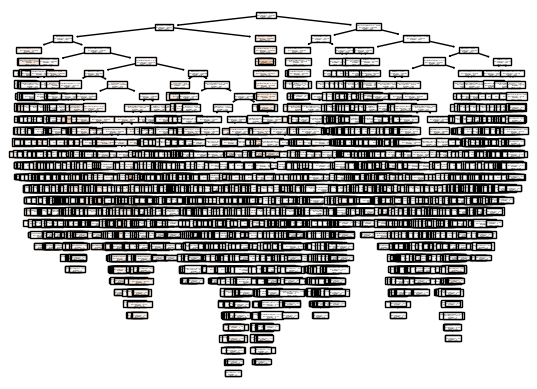

In [19]:
plot_tree(decision_tree=modelo_arbol,
          feature_names=x.columns,
          filled=True)

In [20]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [21]:
# Parámetros a evaluar
params_arbol_1 = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [22]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [23]:
modelo_final_arbol = grid_search_arbol.best_estimator_

[Text(0.36160714285714285, 0.9166666666666666, 'ExitRates <= -0.18\nsquared_error = 276.057\nsamples = 8631\nvalue = 5.047'),
 Text(0.14285714285714285, 0.75, 'Browser <= 12.339\nsquared_error = 592.31\nsamples = 2849\nvalue = 10.047'),
 Text(0.25223214285714285, 0.8333333333333333, 'True  '),
 Text(0.10714285714285714, 0.5833333333333334, 'ExitRates <= -0.702\nsquared_error = 524.345\nsamples = 2830\nvalue = 9.753'),
 Text(0.07142857142857142, 0.4166666666666667, 'squared_error = 1424.06\nsamples = 57\nvalue = 28.305'),
 Text(0.14285714285714285, 0.4166666666666667, 'ProductRelatedDuration <= -0.088\nsquared_error = 498.631\nsamples = 2773\nvalue = 9.372'),
 Text(0.07142857142857142, 0.25, 'Region <= 8.447\nsquared_error = 328.064\nsamples = 794\nvalue = 4.621'),
 Text(0.03571428571428571, 0.08333333333333333, 'squared_error = 219.098\nsamples = 746\nvalue = 4.06'),
 Text(0.10714285714285714, 0.08333333333333333, 'squared_error = 1940.534\nsamples = 48\nvalue = 13.347'),
 Text(0.21428

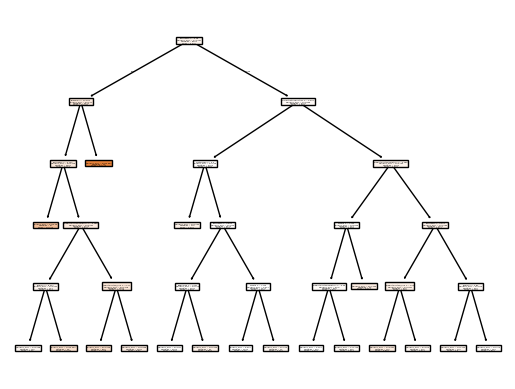

In [24]:
plot_tree(decision_tree=modelo_final_arbol,
            feature_names=x.columns,
            filled=True
                        )

## 

In [25]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)

In [26]:
df_resultados_arbol.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
179,0.05,0.00,0.01,0.00,5,30,10,200,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-231.83,-243.59,-307.31,-252.48,-230.51,-253.14,28.26,1
163,0.05,0.00,0.00,0.00,5,20,10,200,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...",-231.83,-244.23,-307.31,-252.51,-230.51,-253.28,28.21,2
177,0.05,0.00,0.01,0.00,5,30,10,50,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-233.25,-244.88,-307.09,-250.26,-232.08,-253.51,27.66,3
178,0.05,0.01,0.01,0.00,5,30,10,100,"{'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...",-233.25,-244.88,-307.05,-251.64,-230.79,-253.52,27.83,4
161,0.04,0.00,0.00,0.00,5,20,10,50,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...",-233.04,-246.88,-307.07,-250.38,-231.95,-253.86,27.59,5


In [27]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
179,5,30,10,200,-253.14
163,5,20,10,200,-253.28
177,5,30,10,50,-253.51
178,5,30,10,100,-253.52
161,5,20,10,50,-253.86
...,...,...,...,...,...
199,7,4,50,200,-265.88
103,5,4,50,200,-265.88
7,3,4,50,200,-265.88
352,10,20,10,10,-268.45


In [28]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()


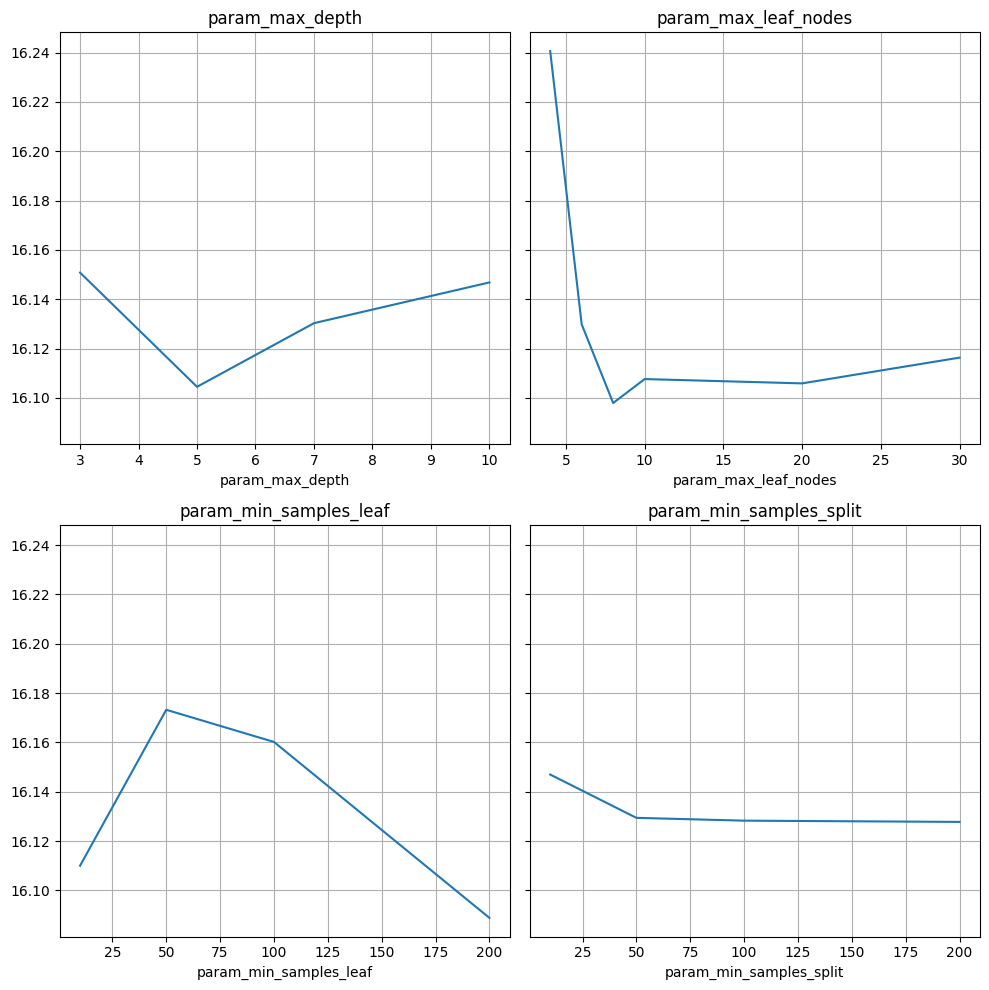

In [29]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 



In [30]:
df_rmse_prof

,param_max_depth,MSE
0,3,16.15
1,5,16.10
2,7,16.13
3,10,16.15


<Axes: xlabel='param_max_depth', ylabel='MSE'>

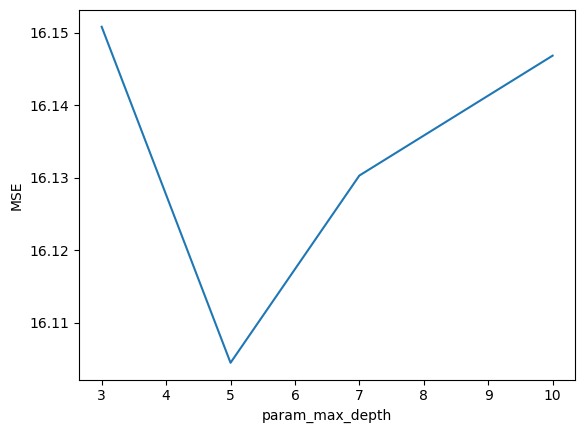

In [31]:
sns.lineplot(x='param_max_depth', y='MSE', data=df_rmse_prof)

In [32]:
pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

,Importancia
ExitRates,0.52
Browser,0.14
ProductRelatedDuration,0.13
ProductRelated_knn,0.09
AdministrativeDuration,0.07
VisitorType,0.02
Region,0.02
Month,0.01
TrafficType,0.01
Informational,0.00


# Ensamble

In [33]:
y_train

,PageValues
8077,0.00
1568,0.00
462,0.00
743,0.00
222,0.00
...,...
11964,0.00
5191,23.39
5390,0.00
860,0.00


In [35]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf.fit(x_train, y_train['PageValues'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [36]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [37]:
modelo_final_rf

RandomForestRegressor(max_depth=5, max_leaf_nodes=30, n_estimators=150,
                      random_state=42)

In [38]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)

In [39]:
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.23,6.90,213.30,14.60
test,0.09,7.06,230.32,15.18


In [ ]:
pd.DataFrame(modelo_final_rf.feature_importances_, columns=['Importancia'], index=x.columns).sort_values(by = 'Importancia', ascending=False)

,Importancia
ExitRates,0.31
Browser,0.20
ProductRelatedDuration,0.14
ProductRelated_knn,0.09
AdministrativeDuration,0.06
Region,0.06
TrafficType,0.05
VisitorType,0.03
Administrative_knn,0.02
Month,0.02


In [41]:
x_train_reducida = x_train.drop(columns= 'InformationalDuration')
x_test_reducida = x_test.drop(columns= 'InformationalDuration')
x_test_reducida.head()

,AdministrativeDuration,Informational,ProductRelatedDuration,ExitRates,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
8916,2.64,0.00,0.35,-0.34,0.53,1.00,0.03,2.00,3.00,5.93,4.89,5.62,5.38
772,0.05,2.00,1.49,-0.57,1.32,2.17,0.29,2.00,2.00,4.74,4.41,3.41,6.82
12250,0.74,0.00,2.90,-0.35,0.00,3.60,-0.18,2.00,2.00,4.79,4.82,5.52,6.69
7793,2.61,0.00,0.01,0.03,0.26,-0.27,0.27,2.00,2.00,5.83,4.63,5.20,6.20
6601,-0.01,0.00,-0.04,0.03,0.00,-0.03,-0.01,2.00,2.00,4.79,3.77,5.20,3.23
